# **Importing the data and explore it and preprocess it as needed**

In [3]:
import pandas as pd


In [4]:
data1 = pd.read_csv('Train_Data/Train.csv')
data2 = pd.read_csv('Train_Data/Train_Vehicletravellingdata.csv')
data3 = pd.read_csv('Train_Data/Train_WeatherData.csv')

In [5]:
data1.shape

(12994, 5)

In [6]:
data2.shape

(162566, 10)

In [7]:
data3.shape

(162566, 9)

In [8]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'V2', 'V5', 'V6', 'DrivingStyle'], dtype='object')
Index(['ID', 'V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V18'], dtype='object')
Index(['ID', 'V1', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19'], dtype='object')


In [9]:
data1 = data1.rename(columns = {'V2':'veincle length' ,
                        'V5':'veincle weight' ,
                        'V6':'axles number'})

In [10]:
data2 = data2.rename(columns = {'V1':'time of collection' ,
                        'V3':'Lane of the road' ,
                        'V4':'veincle speed',
                        'V7':'perceding Veincle ID',
                        'V8':'perceding veincle speed',
                        'V9':'perceding veincle weight',
                        'V10':'perceding veincle length',
                        'V11':'perceding veincle time-gap',
                        'V18':'road condition'})

In [ ]:
data2.drop(['Lane of the road', 
            'perceding Veincle ID',
            'perceding veincle speed',
            'perceding veincle weight',
            'perceding veincle length',
            'perceding veincle time-gap',],
            axis=1, inplace=True)

In [11]:
data3 = data3.rename(columns = {'V1':'time of collection' ,
                        'V12':'Air temprture' ,
                        'V13':'perciption type',
                        'V14':'perciption intensity',
                        'V15':'relatve humadity',
                        'V16':'wind direction',
                        'V17':'wind speed',
                        'V19':'Lighting condition'})

In [12]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'veincle length', 'veincle weight', 'axles number',
       'DrivingStyle'],
      dtype='object')
Index(['ID', 'time of collection', 'Lane of the road', 'veincle speed',
       'perceding Veincle ID', 'perceding veincle speed',
       'perceding veincle weight', 'perceding veincle length',
       'perceding veincle time-gap', 'road condition'],
      dtype='object')
Index(['ID', 'time of collection', 'Air temprture', 'perciption type',
       'perciption intensity', 'relatve humadity', 'wind direction',
       'wind speed', 'Lighting condition'],
      dtype='object')


In [13]:
data1.isnull().sum()

ID                0
veincle length    0
veincle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [14]:
data2.isnull().sum()

ID                               0
time of collection               0
Lane of the road                 0
veincle speed                    0
perceding Veincle ID             0
perceding veincle speed          0
perceding veincle weight         0
perceding veincle length         0
perceding veincle time-gap    2455
road condition                   0
dtype: int64

In [15]:
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture           2057
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [16]:
data1.isna().sum()


ID                0
veincle length    0
veincle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [17]:
data2.isna().sum()


ID                               0
time of collection               0
Lane of the road                 0
veincle speed                    0
perceding Veincle ID             0
perceding veincle speed          0
perceding veincle weight         0
perceding veincle length         0
perceding veincle time-gap    2455
road condition                   0
dtype: int64

In [18]:
data3.isna().sum()

ID                         0
time of collection         0
Air temprture           2057
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [19]:
print(int(data2['perceding veincle time-gap'].mean()))
print(int(data2['perceding veincle time-gap'].median()))
data2['perceding veincle time-gap'].fillna( value = int(data2['perceding veincle time-gap'].median()),inplace= True)
#data2['perceding veincle time-gap'].skew()
data2.isnull().sum()

105
43


ID                            0
time of collection            0
Lane of the road              0
veincle speed                 0
perceding Veincle ID          0
perceding veincle speed       0
perceding veincle weight      0
perceding veincle length      0
perceding veincle time-gap    0
road condition                0
dtype: int64

In [20]:
print(int(data3['Air temprture'].mean()))
print(int(data3['Air temprture'].median()))
data3['Air temprture'].fillna( value = int(data3['Air temprture'].median()),inplace= True)

#data3.isnull().sum()

4
5


In [21]:
data2['road condition'] = pd.factorize(data2['road condition'])[0]

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          162566 non-null  object 
 1   time of collection          162566 non-null  object 
 2   Lane of the road            162566 non-null  int64  
 3   veincle speed               162566 non-null  int64  
 4   perceding Veincle ID        162566 non-null  int64  
 5   perceding veincle speed     162566 non-null  int64  
 6   perceding veincle weight    162566 non-null  int64  
 7   perceding veincle length    162566 non-null  int64  
 8   perceding veincle time-gap  162566 non-null  float64
 9   road condition              162566 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 12.4+ MB


In [23]:
data2_gropued = data2.groupby('ID')[['perceding veincle time-gap','Lane of the road','veincle speed','perceding veincle speed','perceding veincle weight','perceding veincle length','road condition']].mean()

In [24]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   perceding veincle time-gap  12994 non-null  float64
 1   Lane of the road            12994 non-null  float64
 2   veincle speed               12994 non-null  float64
 3   perceding veincle speed     12994 non-null  float64
 4   perceding veincle weight    12994 non-null  float64
 5   perceding veincle length    12994 non-null  float64
 6   road condition              12994 non-null  float64
dtypes: float64(7)
memory usage: 812.1+ KB


In [25]:
data2_gropued = data2_gropued.astype({'Lane of the road':int})

In [26]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   perceding veincle time-gap  12994 non-null  float64
 1   Lane of the road            12994 non-null  int64  
 2   veincle speed               12994 non-null  float64
 3   perceding veincle speed     12994 non-null  float64
 4   perceding veincle weight    12994 non-null  float64
 5   perceding veincle length    12994 non-null  float64
 6   road condition              12994 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 812.1+ KB


In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              12994 non-null  object
 1   veincle length  12994 non-null  int64 
 2   veincle weight  12994 non-null  int64 
 3   axles number    12994 non-null  int64 
 4   DrivingStyle    12994 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 507.7+ KB


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          162566 non-null  object 
 1   time of collection          162566 non-null  object 
 2   Lane of the road            162566 non-null  int64  
 3   veincle speed               162566 non-null  int64  
 4   perceding Veincle ID        162566 non-null  int64  
 5   perceding veincle speed     162566 non-null  int64  
 6   perceding veincle weight    162566 non-null  int64  
 7   perceding veincle length    162566 non-null  int64  
 8   perceding veincle time-gap  162566 non-null  float64
 9   road condition              162566 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 12.4+ MB


In [29]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    162566 non-null  object 
 1   time of collection    162566 non-null  object 
 2   Air temprture         162566 non-null  float64
 3   perciption type       162566 non-null  object 
 4   perciption intensity  162566 non-null  object 
 5   relatve humadity      160461 non-null  float64
 6   wind direction        160452 non-null  float64
 7   wind speed            160102 non-null  float64
 8   Lighting condition    162566 non-null  object 
dtypes: float64(4), object(5)
memory usage: 11.2+ MB


In [30]:
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [31]:
print(int(data3['relatve humadity'].mean()))
print(int(data3['relatve humadity'].median()))

60
58


In [32]:
data3['relatve humadity'].fillna( value = data3['relatve humadity'].median)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [33]:
print(int(data3['wind direction'].mean()))
print(int(data3['wind direction'].median()))

182
180


In [34]:
data3['wind direction'].fillna( value = int(data3['wind direction'].median()),inplace= True)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction             0
wind speed              2464
Lighting condition         0
dtype: int64

In [35]:
print(int(data3['wind speed'].mean()))
print(int(data3['wind speed'].median()))

4
4


In [36]:
data3['wind speed'].fillna( value = int(data3['wind speed'].median()),inplace= True)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction             0
wind speed                 0
Lighting condition         0
dtype: int64

In [37]:
data3['perciption type'] = pd.factorize(data3['perciption type'])[0]
data3['perciption intensity'] = pd.factorize(data3['perciption intensity'])[0]
data3['Lighting condition'] = pd.factorize(data3['Lighting condition'])[0]

In [38]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    162566 non-null  object 
 1   time of collection    162566 non-null  object 
 2   Air temprture         162566 non-null  float64
 3   perciption type       162566 non-null  int64  
 4   perciption intensity  162566 non-null  int64  
 5   relatve humadity      160461 non-null  float64
 6   wind direction        162566 non-null  float64
 7   wind speed            162566 non-null  float64
 8   Lighting condition    162566 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 11.2+ MB


In [39]:
data3_gropued = data3.groupby('ID')[['Air temprture','perciption type','perciption intensity','relatve humadity','wind direction','wind speed','Lighting condition']].mean()

In [40]:
data2_gropued.head()

,perceding veincle time-gap,Lane of the road,veincle speed,perceding veincle speed,perceding veincle weight,perceding veincle length,road condition
ID,,,,,,,
DR_10002,234.800000,1,84.400000,77.000000,4200.400000,762.000000,0.0
DR_10013,173.111111,1,86.555556,85.777778,9517.888889,1184.888889,0.0
DR_10023,66.812500,1,83.125000,81.625000,10180.187500,1022.312500,0.0
DR_10024,194.166667,1,86.666667,81.500000,6366.333333,1069.666667,0.0
DR_10025,156.125000,1,81.500000,82.500000,10157.875000,1113.625000,1.0


In [41]:
data3_gropued.head()

,Air temprture,perciption type,perciption intensity,relatve humadity,wind direction,wind speed,Lighting condition
ID,,,,,,,
DR_10002,2.2000,0.0,0.0,66.6000,173.200,5.8000,0.0
DR_10013,4.0000,0.0,0.0,58.0000,163.000,8.0000,2.0
DR_10023,6.0625,0.0,0.0,34.0625,205.875,3.0625,2.0
DR_10024,5.0000,2.0,2.0,NaN,180.000,4.0000,1.0
DR_10025,1.0000,0.0,0.0,87.0000,11.000,3.0000,2.0


In [42]:
data1.head()

,ID,veincle length,veincle weight,axles number,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [43]:
print(data1.shape)
print(data2_gropued.shape)
print(data3_gropued.shape)

(12994, 5)
(12994, 7)
(12994, 7)


In [44]:
data1['ID'].drop_duplicates

<bound method Series.drop_duplicates of 0        DR_24526
1        DR_30052
2        DR_40928
3        DR_66033
4        DR_45266
           ...   
12989    DR_61322
12990    DR_35712
12991    DR_61590
12992    DR_69505
12993    DR_56117
Name: ID, Length: 12994, dtype: object>

In [45]:
merged_data = pd.merge(data2_gropued,data3_gropued, on ='ID')

In [46]:
merged_data2 = pd.merge(data1,merged_data, on='ID')

In [47]:
merged_data2.head()

,ID,veincle length,veincle weight,axles number,DrivingStyle,perceding veincle time-gap,Lane of the road,veincle speed,perceding veincle speed,perceding veincle weight,perceding veincle length,road condition,Air temprture,perciption type,perciption intensity,relatve humadity,wind direction,wind speed,Lighting condition
0,DR_24526,1265,10243,2,2,67.842105,1,87.473684,87.052632,8443.789474,965.473684,0.0,7.000000,0.0,0.0,95.000000,125.157895,0.052632,0.0
1,DR_30052,1680,30871,6,2,138.363636,1,82.272727,86.090909,6887.000000,920.636364,0.0,4.636364,0.0,0.0,95.545455,157.818182,6.000000,0.0
2,DR_40928,936,3224,4,2,159.545455,1,85.090909,82.454545,4624.363636,773.909091,0.0,1.545455,1.0,1.0,95.000000,64.454545,0.000000,0.0
3,DR_66033,1503,3315,4,2,118.454545,1,82.818182,83.727273,9229.909091,1210.545455,0.0,3.545455,0.0,0.0,95.000000,169.727273,1.363636,0.0
4,DR_45266,929,3022,4,2,109.500000,1,82.750000,82.916667,3058.416667,723.583333,0.0,3.000000,0.0,0.0,95.000000,191.000000,3.000000,0.0


In [48]:
merged_data2.isnull().sum()

ID                              0
veincle length                  0
veincle weight                  0
axles number                    0
DrivingStyle                    0
perceding veincle time-gap      0
Lane of the road                0
veincle speed                   0
perceding veincle speed         0
perceding veincle weight        0
perceding veincle length        0
road condition                  0
Air temprture                   0
perciption type                 0
perciption intensity            0
relatve humadity              137
wind direction                  0
wind speed                      0
Lighting condition              0
dtype: int64

In [49]:
merged_data2 = merged_data2.dropna(subset=['relatve humadity'])
merged_data2 = merged_data2.drop('ID',axis = 1)

In [50]:
merged_data2.isnull().sum()

veincle length                0
veincle weight                0
axles number                  0
DrivingStyle                  0
perceding veincle time-gap    0
Lane of the road              0
veincle speed                 0
perceding veincle speed       0
perceding veincle weight      0
perceding veincle length      0
road condition                0
Air temprture                 0
perciption type               0
perciption intensity          0
relatve humadity              0
wind direction                0
wind speed                    0
Lighting condition            0
dtype: int64

In [51]:
merged_data2.columns

Index(['veincle length', 'veincle weight', 'axles number', 'DrivingStyle',
       'perceding veincle time-gap', 'Lane of the road', 'veincle speed',
       'perceding veincle speed', 'perceding veincle weight',
       'perceding veincle length', 'road condition', 'Air temprture',
       'perciption type', 'perciption intensity', 'relatve humadity',
       'wind direction', 'wind speed', 'Lighting condition'],
      dtype='object')

In [52]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 12993
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   veincle length              12857 non-null  int64  
 1   veincle weight              12857 non-null  int64  
 2   axles number                12857 non-null  int64  
 3   DrivingStyle                12857 non-null  int64  
 4   perceding veincle time-gap  12857 non-null  float64
 5   Lane of the road            12857 non-null  int64  
 6   veincle speed               12857 non-null  float64
 7   perceding veincle speed     12857 non-null  float64
 8   perceding veincle weight    12857 non-null  float64
 9   perceding veincle length    12857 non-null  float64
 10  road condition              12857 non-null  float64
 11  Air temprture               12857 non-null  float64
 12  perciption type             12857 non-null  float64
 13  perciption intensity        128

In [53]:
merged_data2.shape

(12857, 18)

# **Building differnent models and see which is the best model for the dataset**

---------------------------------
---------------------------------
[3 1 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.7250972922302377
precision = 0.7256271991117744
recall =  0.7259809541545666


---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7491898898250162
f1 score = 0.7222068931924781
precision = 0.7247056180868957
recall =  0.7219717823520396
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7440051847051199
f1 score = 0.7166609819426829
precision = 0.7176816696733889
recall =  0.7173269084158272
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7530784186649384
f1 score = 0.7262754793528573
precision = 0.7285889558281536
recall =  0.7266773748625103
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7491898898250162
f1 score = 0.722490547164348
precision = 0.7229515999874739
recall =  0.7233880964435987
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.7225393673388275
precision = 0.7249905855476378


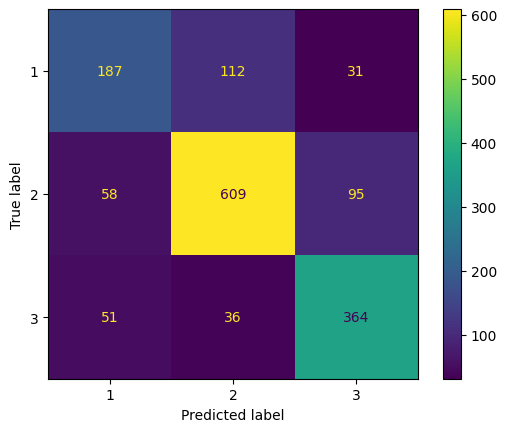

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
X = merged_data2.drop('DrivingStyle' , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(X)
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

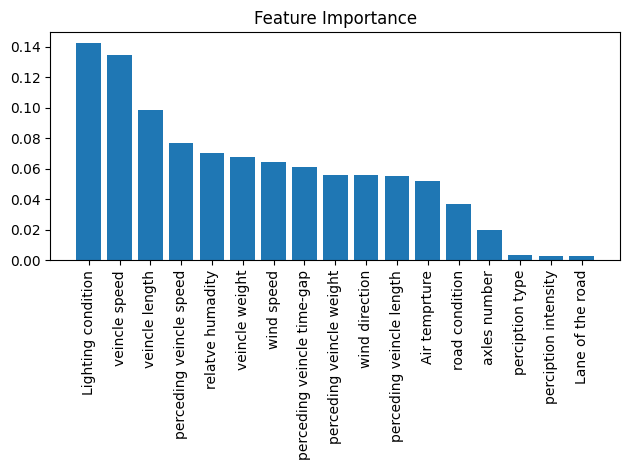

In [55]:
import numpy as np
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [56]:
print(importances[sorted_indices])

[0.14247003 0.13451104 0.09875048 0.0770884  0.07003961 0.06757221
 0.06425003 0.06100644 0.05613393 0.05559729 0.05510361 0.05205582
 0.03664475 0.01986958 0.00347503 0.00298967 0.00244211]


---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7491898898250162
f1 score = 0.7228392288255084
precision = 0.724841247118155
recall =  0.7231783942749951
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.721905583771313
precision = 0.7242871968243415
recall =  0.722365968112079
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7511341542449773
f1 score = 0.7246744134359773
precision = 0.7262543285983766
recall =  0.7247310826723158
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7478937135450421
f1 score = 0.7203581559395166
precision = 0.7214876805744118
recall =  0.7214598452355317
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7465975372650681
f1 score = 0.7178366160996434
precision = 0.7207135053501345
re

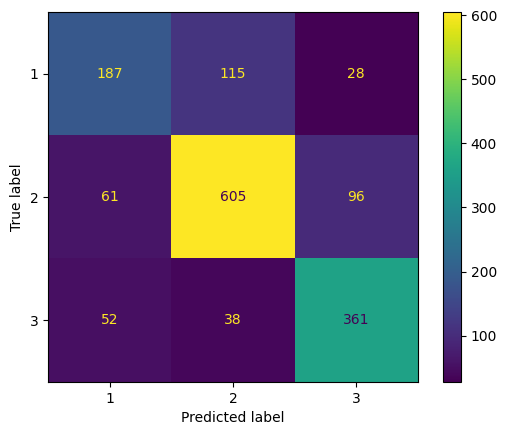

In [57]:
X = merged_data2.drop(['DrivingStyle','perciption type','perciption intensity','Lane of the road'] , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [58]:
for x in range(10):
  scaler =StandardScaler()
  scaler.fit_transform(X)
  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(X, y)
  y_pred = neigh.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815

In [59]:
#from sklearn.pipeline import make_pipeline
#from sklearn.svm import SVC
#for x in range(10):
  #clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  #clf2.fit(X, y)
  #y_pred = clf2.predict(x_test)
  #print("---------------------------------")
  #print("---------------------------------")
  #print(y_pred)
  #print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  #print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  #print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  #print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
---------------------------------
---------------------------------


In [60]:
from sklearn.linear_model import LogisticRegression
for x in range(10):
  clf = LogisticRegression(multi_class='multinomial').fit(X, y)
  y_pred = clf.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
---------------------------------
---------------------------------


/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [61]:
#merged_data2.corr()

In [62]:
#plt.figure(figsize=(17,17))
#import seaborn as sns
#sns.heatmap(merged_data2.corr(), annot = True, fmt='.2g')


# **Feature selection and dimensionility reduction**


In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, f_classif
X = merged_data2.drop('DrivingStyle' , axis = 1)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
features = np.array(X.columns)
filter = model.get_support()
print("All features:")
print(features)
print(filter)
print("Selected best")
print(features[filter])
print(X_new)

All features:
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'perciption type' 'perciption intensity' 'relatve humadity'
 'wind direction' 'wind speed' 'Lighting condition']
[ True  True  True  True  True  True  True False  True  True  True False
 False  True  True  True  True]
Selected best
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle length' 'road condition'
 'Air temprture' 'relatve humadity' 'wind direction' 'wind speed'
 'Lighting condition']
[[1.26500000e+03 1.02430000e+04 2.00000000e+00 ... 1.25157895e+02
  5.26315789e-02 0.00000000e+00]
 [1.68000000e+03 3.08710000e+04 6.00000000e+00 ... 1.57818182e+02
  6.00000000e+00 0.00000000e+00]
 [9.36000000e+02 3.22400000e+03 4.00000000e+00 ...

/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/p.kuznetsov/.local/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [64]:

select = SelectKBest(score_func= f_classif, k=5)
z = select.fit_transform(X, y)
filter = select.get_support()
print("All features:")
print(features)
print(filter)
print("Selected best 4:")
print(features[filter])
print(z)

All features:
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'perciption type' 'perciption intensity' 'relatve humadity'
 'wind direction' 'wind speed' 'Lighting condition']
[ True  True  True False False  True False False False False False False
 False False False False  True]
Selected best 4:
['veincle length' 'veincle weight' 'axles number' 'veincle speed'
 'Lighting condition']
[[1.26500000e+03 1.02430000e+04 2.00000000e+00 8.74736842e+01
  0.00000000e+00]
 [1.68000000e+03 3.08710000e+04 6.00000000e+00 8.22727273e+01
  0.00000000e+00]
 [9.36000000e+02 3.22400000e+03 4.00000000e+00 8.50909091e+01
  0.00000000e+00]
 ...
 [1.74700000e+03 3.18640000e+04 6.00000000e+00 8.42105263e+01
  2.00000000e+00]
 [7.10000000e+02 3.24400000e+03 2.00000000e+00 8.26666667e+01
  2.00000000e+00]
 [2.00100000e+03 2.7812000

---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.7240386866217142
precision = 0.7250367429255687
recall =  0.7248969433144582
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7550226830848995
f1 score = 0.7281256596388667
precision = 0.7303344609967625
recall =  0.7279590605498037
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7556707712248866
f1 score = 0.7306451975386041
precision = 0.7328815228180737
recall =  0.7300531724000132
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.7226495050110313
precision = 0.7249222555779524
recall =  0.7229079735321333
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7537265068049255
f1 score = 0.7284082030686018
precision = 0.7301634187599363

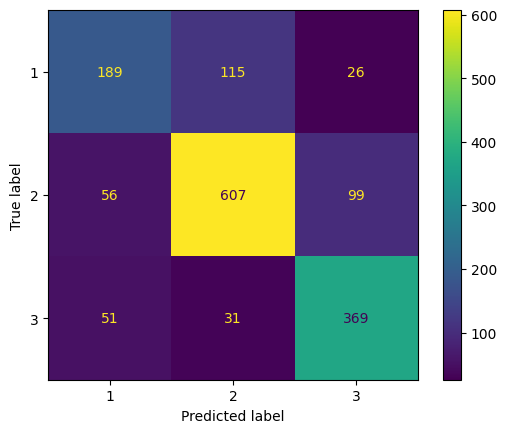

In [65]:
#X = merged_data2[['veincle length','veincle weight','axles number','veincle speed','Lighting condition']]
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
X = merged_data2.drop('DrivingStyle' , axis = 1)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
fit6 = sfs.fit(X, y)
filter = sfs.get_support(True)


In [67]:
print("All features:")
print(features)
print(filter)
print("Selected best 4:")
print(merged_data2.iloc[:,filter].columns)
print(fit6)

All features:
['veincle length' 'veincle weight' 'axles number'
 'perceding veincle time-gap' 'Lane of the road' 'veincle speed'
 'perceding veincle speed' 'perceding veincle weight'
 'perceding veincle length' 'road condition' 'Air temprture'
 'perciption type' 'perciption intensity' 'relatve humadity'
 'wind direction' 'wind speed' 'Lighting condition']
[ 2  4  5  9 12 15 16]
Selected best 4:
Index(['axles number', 'perceding veincle time-gap', 'Lane of the road',
       'perceding veincle length', 'perciption type', 'wind direction',
       'wind speed'],
      dtype='object')
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=7)


---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.49254698639014904
f1 score = 0.4244524667719491
precision = 0.44894649941753145
recall =  0.42462380672482464
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.48865845755022685
f1 score = 0.422322054684423
precision = 0.4467693040423885
recall =  0.42302184510749896
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.5009721322099806
f1 score = 0.43413920323858024
precision = 0.46185826200721936
recall =  0.4345288878801458
---------------------------------
---------------------------------
[3 2 3 ... 1 2 3]
accuracy = 0.4938431626701231
f1 score = 0.4263113981642128
precision = 0.4511052804148037
recall =  0.4273957163336844
---------------------------------
---------------------------------
[3 1 3 ... 2 2 3]
accuracy = 0.49125081011017496
f1 score = 0.4261085500596631
precision = 0.452630545

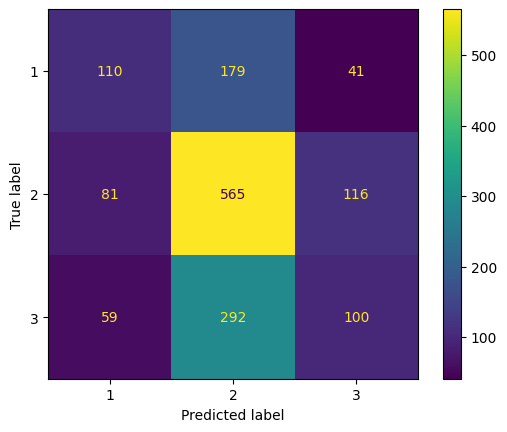

In [68]:
X = merged_data2[['axles number', 'perceding veincle time-gap', 'Lane of the road',
       'perceding veincle length', 'perciption type', 'wind direction',
       'wind speed']]
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [69]:
X = merged_data2.drop('DrivingStyle' , axis = 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
principalComponents = pca.transform(scaled_data)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
newDataframe = pd.concat([principalDataframe, y],axis = 1)
newDataframe.head(5)

,PC1,PC2,DrivingStyle
0,0.005121,-0.181290,2.0
1,2.294377,0.005865,2.0
2,-0.708166,2.855176,2.0
3,0.880399,0.288469,2.0
4,-0.855739,0.354662,2.0


In [70]:
principalDataframe

,PC1,PC2
0,0.005121,-0.181290
1,2.294377,0.005865
2,-0.708166,2.855176
3,0.880399,0.288469
4,-0.855739,0.354662
...,...,...
12852,-1.262327,3.464852
12853,-1.549872,4.124809
12854,2.271723,3.734553
12855,-0.972265,2.499078


---------------------------------
---------------------------------
[3 1 2 ... 2 1 2]
accuracy = 0.4867141931302657
f1 score = 0.44362097999039607
precision = 0.45391210785351466
recall =  0.43962478636955304
---------------------------------
---------------------------------
[3 1 3 ... 1 2 2]
accuracy = 0.4795852235904083
f1 score = 0.43648512203988016
precision = 0.4459127287750639
recall =  0.4327932678038305
---------------------------------
---------------------------------
[3 1 3 ... 1 1 2]
accuracy = 0.48412184057031754
f1 score = 0.4391352295015054
precision = 0.45031333681485347
recall =  0.43552308178772553
---------------------------------
---------------------------------
[3 1 3 ... 1 1 2]
accuracy = 0.48217757615035645
f1 score = 0.4374936431062379
precision = 0.4468441014765627
recall =  0.43424139610043205
---------------------------------
---------------------------------
[3 1 3 ... 2 1 2]
accuracy = 0.48217757615035645
f1 score = 0.4370226397485864
precision = 0.447113

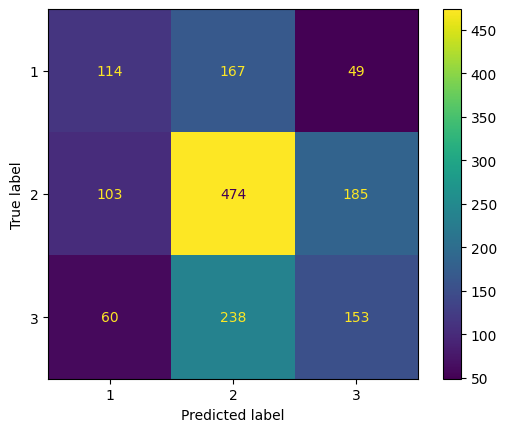

In [71]:
X = principalDataframe
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# **Oversampling and Undersampling**

In [72]:
from collections import Counter
X = merged_data2.drop(['DrivingStyle'] , axis = 1)

In [73]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
print(sorted(Counter(X_resampled).items()))

[(1, 6346), (2, 6346), (3, 6346)]
[('Air temprture', 1), ('Lane of the road', 1), ('Lighting condition', 1), ('axles number', 1), ('perceding veincle length', 1), ('perceding veincle speed', 1), ('perceding veincle time-gap', 1), ('perceding veincle weight', 1), ('perciption intensity', 1), ('perciption type', 1), ('relatve humadity', 1), ('road condition', 1), ('veincle length', 1), ('veincle speed', 1), ('veincle weight', 1), ('wind direction', 1), ('wind speed', 1)]


dict_items([(2, 6346), (1, 2741), (3, 3770)])
dict_items([(2, 6346), (1, 6346), (3, 6346)])
2    6346
3    3770
1    2741
Name: DrivingStyle, dtype: int64


([<matplotlib.patches.Wedge at 0x7f2f437e2b20>,
 [Text(0.02217315292679917, 1.0997765006078666, ''),
  Text(-0.7001221014856635, -0.8484273940717018, ''),
  Text(0.8623676270282761, -0.6828777898376988, '')])

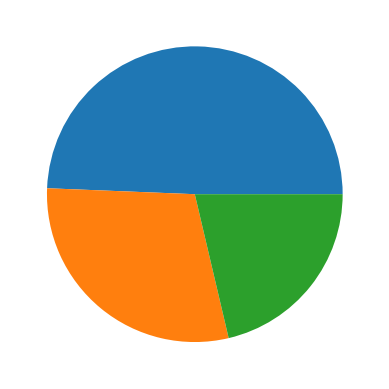

In [74]:
z = Counter(y).items()
v = Counter(y_resampled).items()
u = y.value_counts()
print(z)
print(v)
print(u)
d = merged_data2.DrivingStyle.values
plt.pie(u)

---------------------------------
---------------------------------
[2 2 1 ... 3 3 2]
accuracy = 0.8771008403361344
f1 score = 0.8747254001761121
precision = 0.8827777768017367
recall =  0.8774724124364713
---------------------------------
---------------------------------
[2 1 1 ... 3 3 2]
accuracy = 0.875
f1 score = 0.8726928680674768
precision = 0.8794029547947618
recall =  0.875221476362519
---------------------------------
---------------------------------
[2 2 1 ... 3 3 2]
accuracy = 0.8802521008403361
f1 score = 0.8779570181499999
precision = 0.8854009800417945
recall =  0.8805833069389494
---------------------------------
---------------------------------
[2 2 1 ... 3 3 2]
accuracy = 0.8765756302521008
f1 score = 0.8744154561337624
precision = 0.8815547211666873
recall =  0.8769252242627914
---------------------------------
---------------------------------
[2 2 1 ... 3 3 2]
accuracy = 0.8781512605042017
f1 score = 0.875859795369823
precision = 0.8830502230912233
recall =  0.87

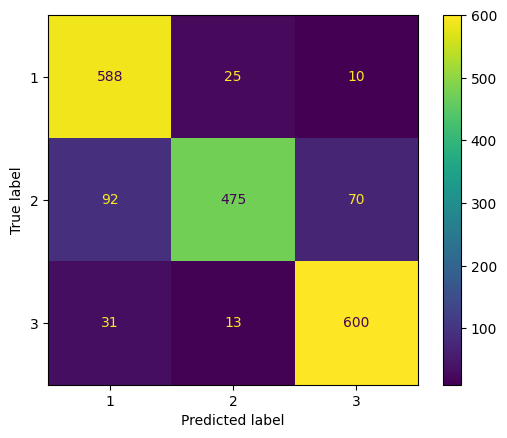

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.1,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

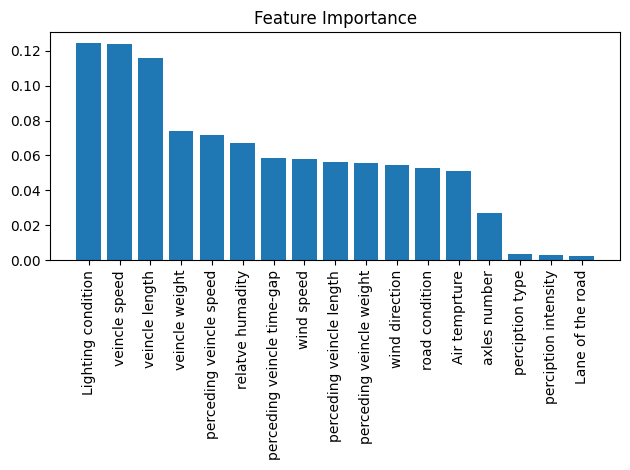

In [76]:
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [77]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf2, X_resampled, y_resampled, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.81722689 0.80252101 0.78860294 0.90937746 1.        ]
Average CV Score:  0.8635456605810173
Number of CV Scores used in Average:  5


In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(clf2, f)